In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from xhistogram.xarray import histogram

In [2]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_2.db')

In [3]:
temp_control = cc.querying.getvar('RYF.t_10.1990_1991.nc', 'tas_10m', session)


In [4]:
temp_month = temp_control.groupby('time.month').mean('time')

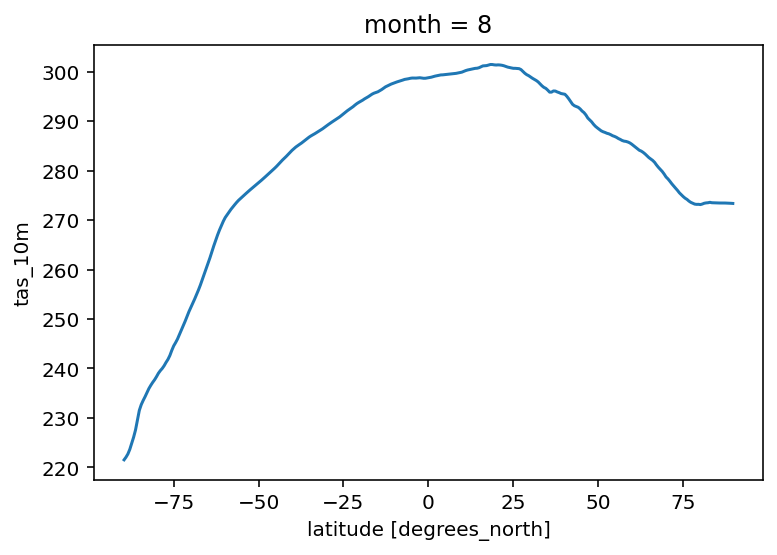

In [5]:
temp_month.mean('longitude').isel(month = 7).plot()

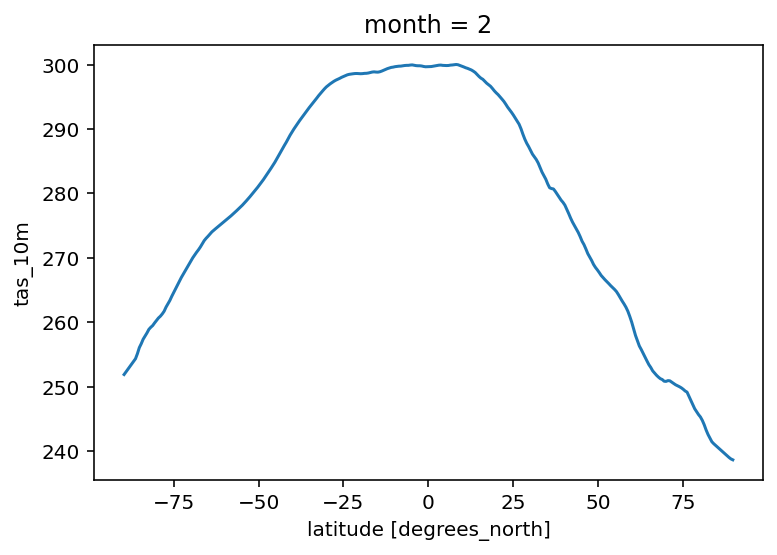

In [6]:
temp_month.mean('longitude').isel(month = 1).plot()

In [7]:
expt = '1deg_jra55_ryf_RCPcont'
variable = 'temp_global_ave'
darray_cont = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cont = darray_cont.groupby('time.year').mean(dim='time')
darray_scont = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scont = darray_scont.groupby('time.year').mean(dim='time')
temp_cont = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cont = temp_cont.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cont= cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_cont = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_cont = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cont = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cont = cc.querying.getvar(expt,'salt',session, ncfile = 'ocean.nc').groupby('time.year').mean(dim='time')
#salt_cont = cc.querying.getvar(expt,'salt',session)#.groupby('time.year').mean(dim='time')
dzt_cont = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cont= cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cont = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)

In [8]:
salt_cont

,Array,Chunk
Bytes,1.30 GB,2.70 MB
Shape,"(60, 50, 300, 360)","(1, 25, 150, 180)"
Count,2886 Tasks,480 Chunks
Type,float32,numpy.ndarray


In [9]:
import gsw
SA = gsw.SA_from_SP(salt_cont,10.1325, 0, 0)
CT_freezing = gsw.CT_freezing(SA,10.1325,0)

(40.0, 90.0)

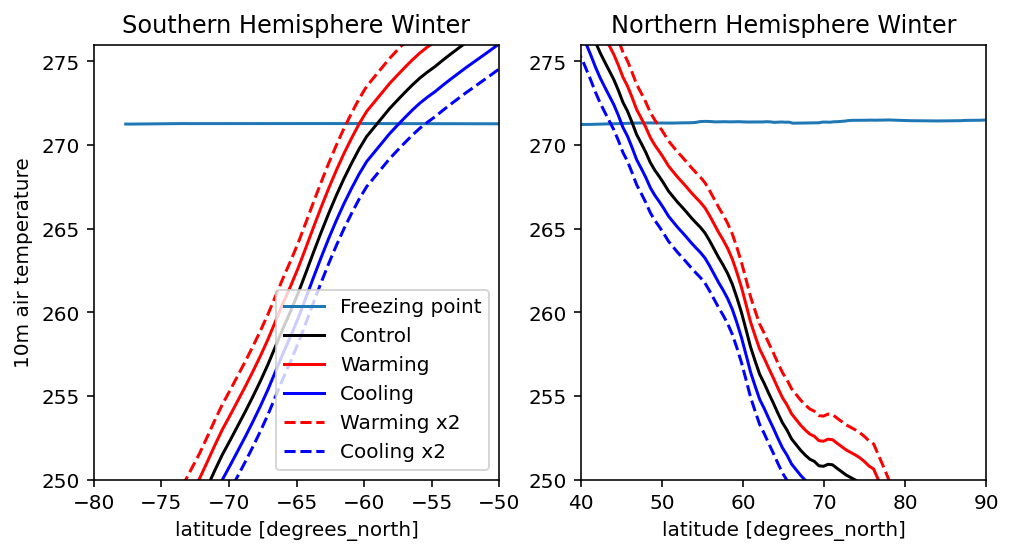

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (8,4))
(CT_freezing+273.15).isel(st_ocean =0).isel(year = 7).mean('xt_ocean').plot(ax = axes[0], label = 'Freezing point')
(CT_freezing+273.15).isel(st_ocean =0).isel(year = 1).mean('xt_ocean').plot(ax = axes[1])

temp_month.mean('longitude').isel(month = 7).plot(color = 'k', linestyle = '-', ax = axes[0], label = 'Control')
(temp_month+1.5).mean('longitude').isel(month = 7).plot(color = 'r', linestyle = '-', ax = axes[0], label = 'Warming')
(temp_month-1.5).mean('longitude').isel(month = 7).plot(color = 'b', linestyle = '-', ax = axes[0], label = 'Cooling')
(temp_month+3).mean('longitude').isel(month = 7).plot(color = 'r', linestyle = '--', ax = axes[0], label = 'Warming x2')
(temp_month-3).mean('longitude').isel(month = 7).plot(color = 'b', linestyle = '--', ax = axes[0], label = 'Cooling x2')
axes[0].set_title('Southern Hemisphere Winter')
axes[0].set_xlim(-80,-50)
axes[0].set_ylim(250,276)
axes[0].legend()
axes[0].set_ylabel('10m air temperature')

temp_month.mean('longitude').isel(month = 1).plot(color = 'k', linestyle = '-', ax = axes[1], label = 'Control')
(temp_month+1.5).mean('longitude').isel(month = 1).plot(color = 'r', linestyle = '-', ax = axes[1], label = 'Warming')
(temp_month-1.5).mean('longitude').isel(month = 1).plot(color = 'b', linestyle = '-', ax = axes[1], label = 'Cooling')
(temp_month+3).mean('longitude').isel(month = 1).plot(color = 'r', linestyle = '--', ax = axes[1], label = 'Warming x2')
(temp_month-3).mean('longitude').isel(month = 1).plot(color = 'b', linestyle = '--', ax = axes[1], label = 'Cooling x2')
axes[1].set_title('Northern Hemisphere Winter')
axes[1].set_ylim(250,276)
axes[1].set_ylabel('')
axes[1].set_xlim(40,90)


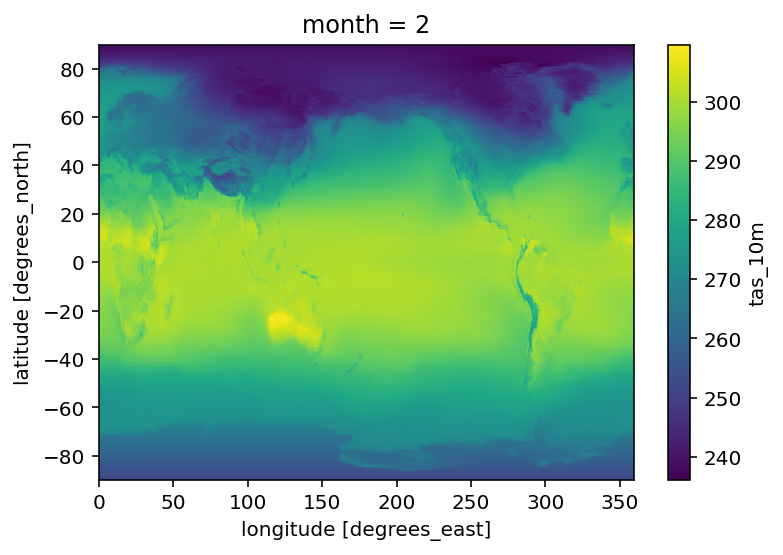

In [11]:
temp_month.isel(month = 1).plot()

In [12]:
temp_month

<xarray.DataArray 'tas_10m' (month: 12, latitude: 320, longitude: 640)>
dask.array<stack, shape=(12, 320, 640), dtype=float32, chunksize=(1, 320, 640), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.57 -89.01 -88.45 ... 88.45 89.01 89.57
  * longitude  (longitude) float64 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

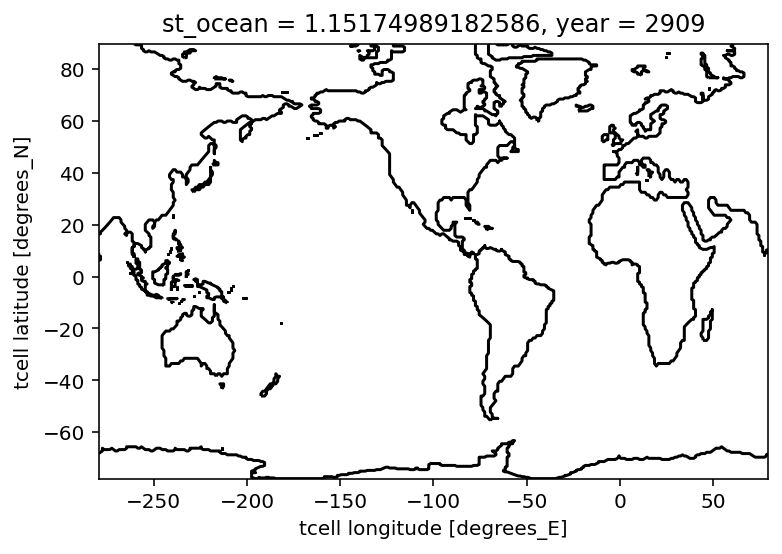

In [13]:
dset = xr.merge([temp_cont.groupby('time.year').mean(dim='time').isel(year = 19,st_ocean = 0)])
ds = dset
mask_ocean = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.temp)  
mask_land = 0 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.temp)  
mask_array = mask_ocean + mask_land
mask_array.plot.contour(colors = 'k', levels = [2])

In [14]:
mask_array2 = ds.temp-ds.temp+1 #this is a mask with land as NAN

In [15]:
temp_month_a = temp_month.sel(longitude = slice(-0.5,80))
temp_month_b = temp_month.sel(longitude = slice(80,360))
temp_month_b.coords['longitude'] =temp_month_b.longitude.values -360 
#temp_month_a2 = temp_month_a.interp(latitude = mask_array.yt_ocean,longitude = mask_array.xt_ocean,method="linear" )
#temp_month_b2 = temp_month_b.interp(latitude = mask_array.yt_ocean,longitude = mask_array.xt_ocean,method="linear" )
#temp_month_b2+temp_month_a2
temp_month_2 = xr.concat([temp_month_b,temp_month_a], dim = 'longitude').interp(latitude = mask_array.yt_ocean,longitude = mask_array.xt_ocean,method="linear" )

In [16]:
#temp_month2 = (temp_month_b2.fillna(0)+temp_month_a2.fillna(0))
temp_month3 =(temp_month_2*mask_array2)#.isel(month=0).plot()

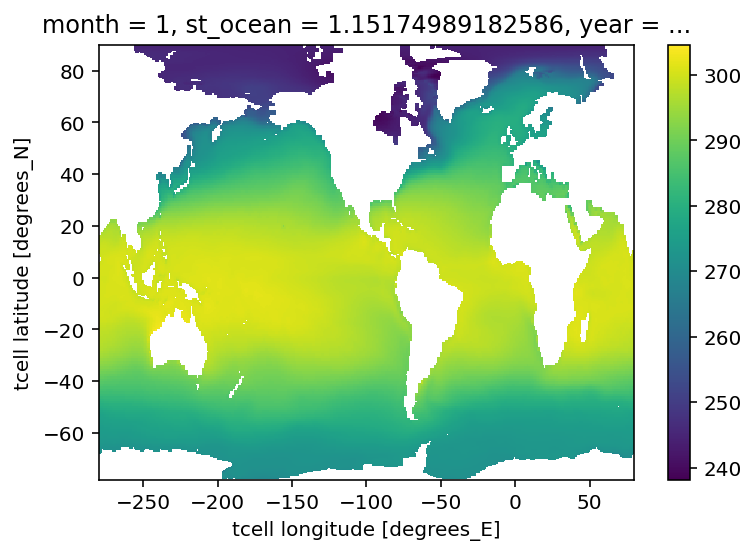

In [17]:
(temp_month_2*mask_array2).isel(month=0).plot()

(40.0, 90.0)

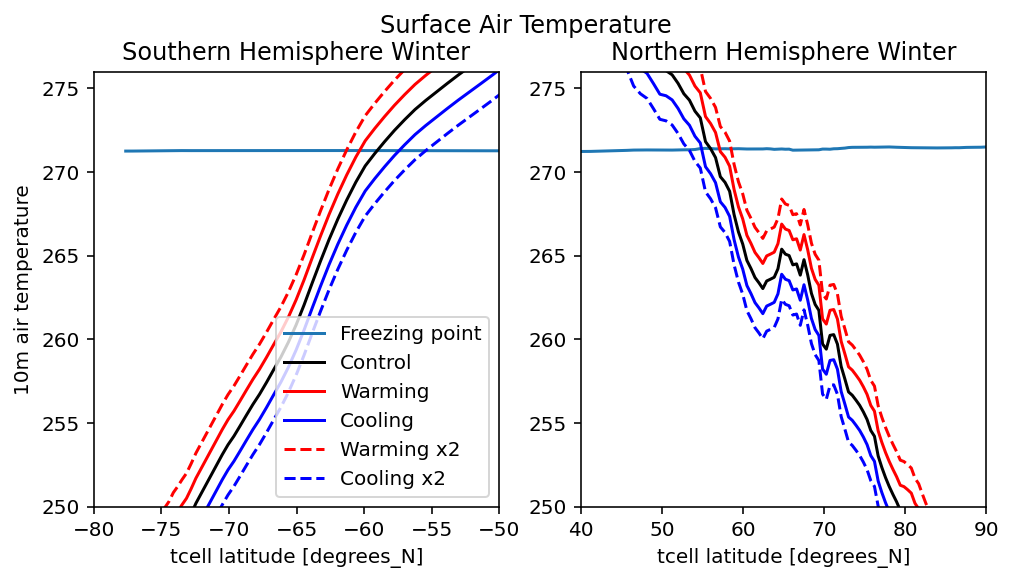

In [54]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (8,4))
plt.suptitle('Surface Air Temperature')
(CT_freezing+273.15).isel(st_ocean =0).isel(year = 7).mean('xt_ocean').plot(ax = axes[0], label = 'Freezing point')
(CT_freezing+273.15).isel(st_ocean =0).isel(year = 1).mean('xt_ocean').plot(ax = axes[1])

temp_month3.mean('xt_ocean').isel(month = 7).plot(color = 'k', linestyle = '-', ax = axes[0], label = 'Control')
(temp_month3+1.5).mean('xt_ocean').isel(month = 7).plot(color = 'r', linestyle = '-', ax = axes[0], label = 'Warming')
(temp_month3-1.5).mean('xt_ocean').isel(month = 7).plot(color = 'b', linestyle = '-', ax = axes[0], label = 'Cooling')
(temp_month3+3).mean('xt_ocean').isel(month = 7).plot(color = 'r', linestyle = '--', ax = axes[0], label = 'Warming x2')
(temp_month3-3).mean('xt_ocean').isel(month = 7).plot(color = 'b', linestyle = '--', ax = axes[0], label = 'Cooling x2')
axes[0].set_title('Southern Hemisphere Winter')
axes[0].set_xlim(-80,-50)
axes[0].set_ylim(250,276)
axes[0].legend()
axes[0].set_ylabel('10m air temperature')

temp_month3.mean('xt_ocean').isel(month = 0).plot(color = 'k', linestyle = '-', ax = axes[1], label = 'Control')
(temp_month3+1.5).mean('xt_ocean').isel(month = 0).plot(color = 'r', linestyle = '-', ax = axes[1], label = 'Warming')
(temp_month3-1.5).mean('xt_ocean').isel(month = 0).plot(color = 'b', linestyle = '-', ax = axes[1], label = 'Cooling')
(temp_month3+3).mean('xt_ocean').isel(month = 0).plot(color = 'r', linestyle = '--', ax = axes[1], label = 'Warming x2')
(temp_month3-3).mean('xt_ocean').isel(month = 0).plot(color = 'b', linestyle = '--', ax = axes[1], label = 'Cooling x2')
axes[1].set_title('Northern Hemisphere Winter')
axes[1].set_ylim(250,276)
axes[1].set_ylabel('')
axes[1].set_xlim(40,90)


(40.0, 90.0)

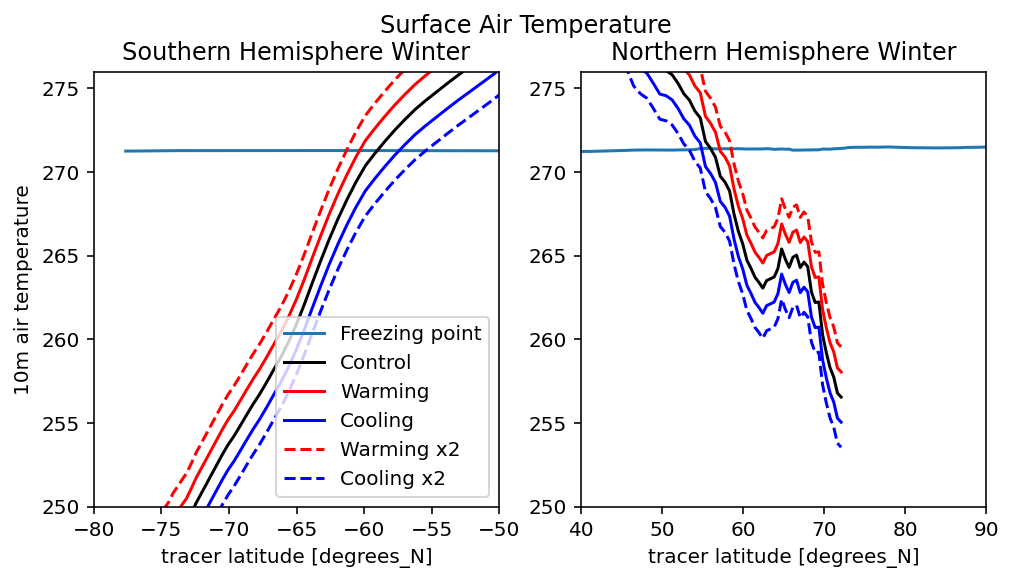

In [56]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (8,4))
plt.suptitle('Surface Air Temperature')
(CT_freezing+273.15).isel(st_ocean =0).isel(year = 7).mean('xt_ocean').plot(ax = axes[0], label = 'Freezing point')
(CT_freezing+273.15).isel(st_ocean =0).isel(year = 1).mean('xt_ocean').plot(ax = axes[1])

(true_zonal_mean_1d(temp_month3, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')).isel(month = 7).plot(color = 'k', linestyle = '-', ax = axes[0], label = 'Control')
(true_zonal_mean_1d(temp_month3, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')+1.5).isel(month = 7).plot(color = 'r', linestyle = '-', ax = axes[0], label = 'Warming')
(true_zonal_mean_1d(temp_month3, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')-1.5).isel(month = 7).plot(color = 'b', linestyle = '-', ax = axes[0], label = 'Cooling')
(true_zonal_mean_1d(temp_month3, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')+3).isel(month = 7).plot(color = 'r', linestyle = '--', ax = axes[0], label = 'Warming x2')
(true_zonal_mean_1d(temp_month3, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')-3).isel(month = 7).plot(color = 'b', linestyle = '--', ax = axes[0], label = 'Cooling x2')
axes[0].set_title('Southern Hemisphere Winter')
axes[0].set_xlim(-80,-50)
axes[0].set_ylim(250,276)
axes[0].legend()
axes[0].set_ylabel('10m air temperature')

(true_zonal_mean_1d(temp_month3, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')).isel(month = 0).plot(color = 'k', linestyle = '-', ax = axes[1], label = 'Control')
(true_zonal_mean_1d(temp_month3, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')+1.5).isel(month = 0).plot(color = 'r', linestyle = '-', ax = axes[1], label = 'Warming')
(true_zonal_mean_1d(temp_month3, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')-1.5).isel(month = 0).plot(color = 'b', linestyle = '-', ax = axes[1], label = 'Cooling')
(true_zonal_mean_1d(temp_month3, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')+3).isel(month = 0).plot(color = 'r', linestyle = '--', ax = axes[1], label = 'Warming x2')
(true_zonal_mean_1d(temp_month3, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')-3).isel(month = 0).plot(color = 'b', linestyle = '--', ax = axes[1], label = 'Cooling x2')
axes[1].set_title('Northern Hemisphere Winter')
axes[1].set_ylim(250,276)
axes[1].set_ylabel('')
axes[1].set_xlim(40,90)


In [58]:
expt = '1deg_jra55_ryf_RCPcoolhumid'
SST_cool = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)
expt = '1deg_jra55_ryf_RCPwarmhumid'
SST_warm = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)
expt = '1deg_jra55_ryf_RCPcoolhumid2x'
SST_cool2x = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)
expt = '1deg_jra55_ryf_RCPwarmhumid2x'
SST_warm2x = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


Text(0.5, 1.0, 'Northern Hemisphere Winter Year 50')

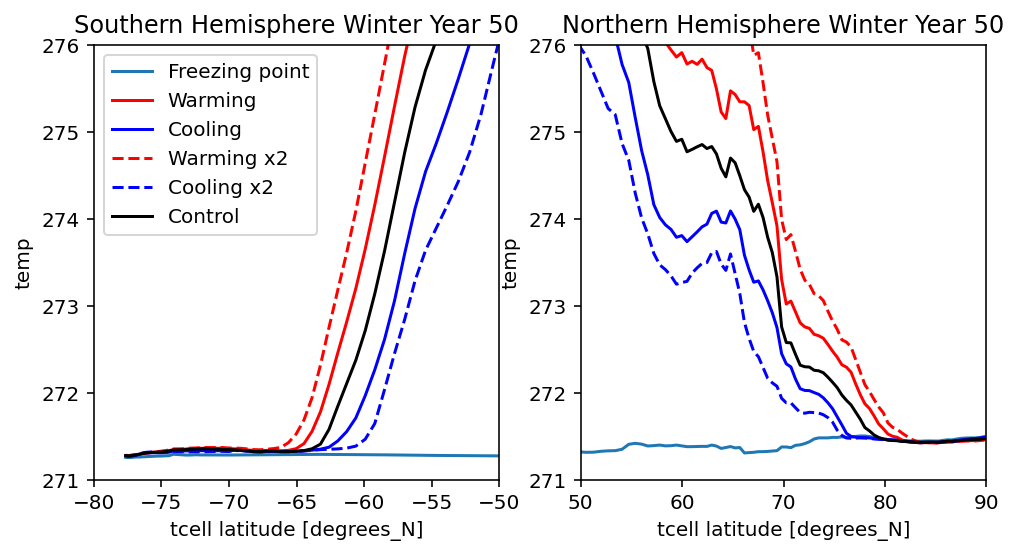

In [59]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (8,4))
(CT_freezing+273.15).isel(st_ocean =0).isel(year= np.arange(9,59)).mean('year').mean('xt_ocean').plot(ax = axes[0], label = 'Freezing point')
(CT_freezing+273.15).isel(st_ocean =0).isel(year= np.arange(9,59)).mean('year').mean('xt_ocean').plot(ax = axes[1])


SST_warm.isel(time = 595).mean('xt_ocean').plot(color = 'r', linestyle = '-', ax = axes[0], label = 'Warming')
SST_cool.isel(time = 595).mean('xt_ocean').plot(color = 'b', linestyle = '-', ax = axes[0], label = 'Cooling')
SST_warm2x.isel(time = 595).mean('xt_ocean').plot(color = 'r', linestyle = '--', ax = axes[0], label = 'Warming x2')
SST_cool2x.isel(time = 595).mean('xt_ocean').plot(color = 'b', linestyle = '--', ax = axes[0], label = 'Cooling x2')
SST_cont.isel(time = 595).mean('xt_ocean').plot(color = 'k', linestyle = '-', ax = axes[0], label = 'Control')
axes[0].set_title('Southern Hemisphere Winter Year 50')
axes[0].set_xlim(-80,-50)
axes[0].set_ylim(271,276)
axes[0].legend()

axes[1].set_ylim(271,276)
axes[1].set_ylabel('')


axes[1].set_xlim(50,90)
SST_warm.isel(time = 590).mean('xt_ocean').plot(color = 'r', linestyle = '-', ax = axes[1])
SST_cool.isel(time = 590).mean('xt_ocean').plot(color = 'b', linestyle = '-', ax = axes[1])
SST_warm2x.isel(time = 590).mean('xt_ocean').plot(color = 'r', linestyle = '--', ax = axes[1])
SST_cool2x.isel(time = 590).mean('xt_ocean').plot(color = 'b', linestyle = '--', ax = axes[1])
SST_cont.isel(time = 590).mean('xt_ocean').plot(color = 'k', linestyle = '-', ax = axes[1])
axes[1].set_title('Northern Hemisphere Winter Year 50')


In [64]:
from dask.distributed import Client
from datetime import timedelta

client = Client()
client


Client Scheduler: tcp://127.0.0.1:39133 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


Text(0.5, 1.0, 'Northern Hemisphere Winter Year 50')

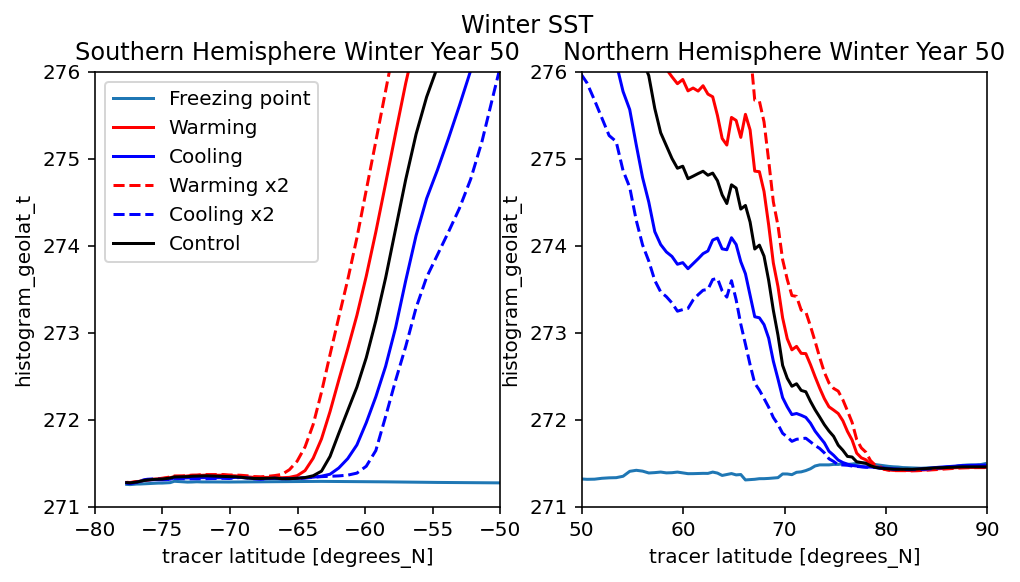

In [65]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (8,4))
plt.suptitle('Winter SST')
(CT_freezing+273.15).isel(st_ocean =0).isel(year= np.arange(9,59)).mean('year').mean('xt_ocean').plot(ax = axes[0], label = 'Freezing point')
(CT_freezing+273.15).isel(st_ocean =0).isel(year= np.arange(9,59)).mean('year').mean('xt_ocean').plot(ax = axes[1])


(true_zonal_mean_1d_time(SST_warm, '1deg_jra55_ryf_RCPwarmhumid', 'ocean_heat.nc')).isel(time = 595).plot(color = 'r', linestyle = '-', ax = axes[0], label = 'Warming')
(true_zonal_mean_1d_time(SST_cool, '1deg_jra55_ryf_RCPcoolhumid', 'ocean_heat.nc')).isel(time = 595).plot(color = 'b', linestyle = '-', ax = axes[0], label = 'Cooling')
(true_zonal_mean_1d_time(SST_warm2x, '1deg_jra55_ryf_RCPwarmhumid2x', 'ocean_heat.nc')).isel(time = 595).plot(color = 'r', linestyle = '--', ax = axes[0], label = 'Warming x2')
(true_zonal_mean_1d_time(SST_cool2x, '1deg_jra55_ryf_RCPcoolhumid2x', 'ocean_heat.nc')).isel(time = 595).plot(color = 'b', linestyle = '--', ax = axes[0], label = 'Cooling x2')
(true_zonal_mean_1d_time(SST_cont, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')).isel(time = 595).plot(color = 'k', linestyle = '-', ax = axes[0], label = 'Control')
axes[0].set_title('Southern Hemisphere Winter Year 50')
axes[0].set_xlim(-80,-50)
axes[0].set_ylim(271,276)
axes[0].legend()

axes[1].set_ylim(271,276)
axes[1].set_ylabel('')


axes[1].set_xlim(50,90)
(true_zonal_mean_1d_time(SST_warm, '1deg_jra55_ryf_RCPwarmhumid', 'ocean_heat.nc')).isel(time = 590).plot(color = 'r', linestyle = '-', ax = axes[1], label = 'Warming')
(true_zonal_mean_1d_time(SST_cool, '1deg_jra55_ryf_RCPcoolhumid', 'ocean_heat.nc')).isel(time = 590).plot(color = 'b', linestyle = '-', ax = axes[1], label = 'Cooling')
(true_zonal_mean_1d_time(SST_warm2x, '1deg_jra55_ryf_RCPwarmhumid2x', 'ocean_heat.nc')).isel(time = 590).plot(color = 'r', linestyle = '--', ax = axes[1], label = 'Warming x2')
(true_zonal_mean_1d_time(SST_cool2x, '1deg_jra55_ryf_RCPcoolhumid2x', 'ocean_heat.nc')).isel(time = 590).plot(color = 'b', linestyle = '--', ax = axes[1], label = 'Cooling x2')
(true_zonal_mean_1d_time(SST_cont, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')).isel(time = 590).plot(color = 'k', linestyle = '-', ax = axes[1], label = 'Control')
axes[1].set_title('Northern Hemisphere Winter Year 50')


Looks good in SH but not in North. Zonal mean is not so meaningful, weird bumps presumably due to landmasses/less water at some latitudes being skewed by other places.

many issues:

- FIXED xarray interp is not happy with converting negative longitudes to positive ones

- FIXED 0s should be NaNs

- FIXED tripolar grid affects data above 65N and that's the region where the SST plot hits freezing temp

Doing the true zonal mean is annoying.... can I make a function that does it for me?

In [50]:
def true_zonal_mean_1d(array,expt, dzt_ncfile):
    variable_to_average = array
    coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
    variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
    yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
    bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
    dzt = cc.querying.getvar(expt, 'dzt', session, ncfile=dzt_ncfile).isel(time = np.arange(12)).groupby('time.month').mean('time') #thickness of cells
    area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
    dVol = dzt*area_t
    histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
    histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
    coord_mean = (histTVolCoordDepth/histVolCoordDepth).isel(st_ocean = 0)
    return coord_mean

In [57]:
def true_zonal_mean_1d_time(array,expt, dzt_ncfile):
    variable_to_average = array
    coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
    variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
    yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
    bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
    dzt = cc.querying.getvar(expt, 'dzt', session, ncfile=dzt_ncfile) #thickness of cells
    area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
    dVol = dzt*area_t
    histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
    histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
    coord_mean = (histTVolCoordDepth/histVolCoordDepth).isel(st_ocean = 0)
    return coord_mean

In [51]:
true_zonal_mean_1d(temp_month3, '1deg_jra55_ryf_RCPcont', 'ocean_heat.nc')

<xarray.DataArray 'histogram_geolat_t' (month: 12, geolat_t_bin: 300)>
dask.array<getitem, shape=(12, 300), dtype=float64, chunksize=(1, 300), chunktype=numpy.ndarray>
Coordinates:
  * month         (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    st_ocean      float64 1.152
  * geolat_t_bin  (geolat_t_bin) float64 -83.88 -77.63 -77.38 ... 89.32 89.77

In [24]:
expt =  '1deg_jra55_ryf_RCPcoolhumid' #Choose any run
variable = 'temp' #any scalar variable where volume weighted averaging makes sense
variable_to_average = cc.querying.getvar(expt, variable, session, ncfile='ocean_heat.nc')
variable_to_average

,Array,Chunk
Bytes,12.96 GB,2.70 MB
Shape,"(600, 50, 300, 360)","(1, 25, 150, 180)"
Count,9605 Tasks,4800 Chunks
Type,float32,numpy.ndarray


In [36]:
variable_to_average = temp_month3

In [42]:
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer

#Define the coordinate bins as the latitude edges of the T-cells
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
#make numpy array (using .values) and add 1st edge at -90
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 

#Alternatively we could just use some regular grid like this 
#coordbins =  np.linspace(-80, 90, 50)
#or use a grid from a different (coarser) model.

dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean_heat.nc').isel(time = np.arange(12)).groupby('time.month').mean('time') #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
dVol = area_t*dzt #Volume of cells

In [43]:
histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean = (histTVolCoordDepth/histVolCoordDepth)#.groupby('time.year').mean(dim='time')

In [47]:
coord_mean

<xarray.DataArray 'histogram_geolat_t' (month: 12, st_ocean: 50, geolat_t_bin: 300)>
dask.array<truediv, shape=(12, 50, 300), dtype=float64, chunksize=(1, 50, 300), chunktype=numpy.ndarray>
Coordinates:
  * month         (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * st_ocean      (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
  * geolat_t_bin  (geolat_t_bin) float64 -83.88 -77.63 -77.38 ... 89.32 89.77

In [46]:
plt.figure(figsize=(10, 5))
coord_mean.sel(month=0).plot()
plt.title('True zonal mean');

KeyError: 0

<Figure size 720x360 with 0 Axes>

In [113]:
coord_mean

<xarray.DataArray 'histogram_geolat_t' (time: 600, st_ocean: 50, geolat_t_bin: 300)>
dask.array<truediv, shape=(600, 50, 300), dtype=float64, chunksize=(1, 50, 300), chunktype=numpy.ndarray>
Coordinates:
  * time          (time) object 2900-01-16 12:00:00 ... 2949-12-16 12:00:00
  * st_ocean      (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
  * geolat_t_bin  (geolat_t_bin) float64 -83.88 -77.63 -77.38 ... 89.32 89.77